# 2021.5.25 污泥项目工作汇报

# 利用污泥产量（Sludge Generation，SG）推算温室气体（GreenHouse Gas，GHG）排放

## Step 1：数据准备
[1] Liangliang Wei et al. Development, current state and future trends of sludge management in China: Based on exploratory data and CO 2 -equivaient emissions analysis. 2020, 144

[2] Yan Ru Fang et al. Spatio-temporal distribution of sewage sludge, its methane production potential, and a greenhouse gas emissions analysis[J]. Journal of Cleaner Production, 2019, 23

基于[2]将我国污泥处置方式分为Landfill，Incineration，Land application以及Building material production，根据文中数据得到不同污泥处置方式产生的等价CO2排放量；

基于[2]得到我国各省份不同处置方式占当地污泥处置的比例；

基于[1]得到我国未来污泥处置方式的变化：2030年，四种污泥处置方式分别占比 10% 20% 55% 15%


## Step 2：计算2017年污泥处理产生的温室气体

温室气体排放总量 = 污泥总量 $\times$ 不同污泥处置方式比例 $\times$该处置方式下温室气体排放量

将污泥处置产生的碳排放与当地总碳排放量进行比较

### Step 3：计算未来（2030年）污泥处理产生的温室气体

由于我国承诺在2030年前后实现碳达峰，本次利用2030年数据对污泥处置产生的温室气体进行估算

In [3]:
import pandas as pd
import numpy as np
#import pygal
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
#plt.style.use(['science','ieee','no-latex'])

In [4]:
#读取并展示数据
data = pd.ExcelFile('Sludge_GHG.xlsx')
S2GHG = data.parse('S2GHG')
Disposal = data.parse('Disposal')
Sludge_2017_pro =data.parse('Sludge_2017_pro')
CO2_2030 = data.parse('CO2_2030')
S2GHG.set_index('Process', inplace=True)

display(S2GHG.head())
display(Disposal.head())
display(Sludge_2017_pro.head())

,Landfill,Incineration,Land_application,Building_material
Process,,,,
Before_AD,1992,5850,509,5840
After_AD,568,4000,351,842


,Province,Landfill_2015,Incineration_2015,Land_application_2015,Building_material_2015,Landfill_percent_2015,Incineration_percent_2015,Land_application_percent_2015,Building_material_percent_2015,Landfill_percent_2030,Incineration_percent_2030,Land_application_percent_2030,Building_material_percent_2030,other
0,Beijing,53.0,15.5,147.9,11.1,0.232967,0.068132,0.650110,0.048791,0.1,0.2,0.55,0.15,0.05
1,Tianjin,42.9,5.8,12.1,22.7,0.513772,0.069461,0.144910,0.271856,0.1,0.2,0.55,0.15,0.05
2,Hebei,267.7,12.3,101.5,7.0,0.689060,0.031660,0.261261,0.018018,0.1,0.2,0.55,0.15,0.05
3,Shanxi,59.4,8.2,42.6,2.6,0.526596,0.072695,0.377660,0.023050,0.1,0.2,0.55,0.15,0.05
4,Inner Mongolia,82.2,4.8,1.4,4.2,0.887689,0.051836,0.015119,0.045356,0.1,0.2,0.55,0.15,0.05


,Province,Sludge,WWP
0,Beijing,1379965,4923895
1,Tianjin,110247,177677
2,Hebei,376190,99719
3,Shanxi,160781,165919
4,Inner Mongolia,225577,73861


In [5]:
Disposal_Sludge_2017_pro = Sludge_2017_pro.merge(Disposal, on='Province', how='inner')
Disposal_Sludge_2017_pro['Landfill_2017'] = Disposal_Sludge_2017_pro.Sludge\
                                                   *Disposal_Sludge_2017_pro.Landfill_percent_2015
Disposal_Sludge_2017_pro['Incineration_2017'] = Disposal_Sludge_2017_pro.Sludge\
                                                   *Disposal_Sludge_2017_pro.Incineration_percent_2015
Disposal_Sludge_2017_pro['Land_application_2017'] = Disposal_Sludge_2017_pro.Sludge\
                                                   *Disposal_Sludge_2017_pro.Land_application_percent_2015
Disposal_Sludge_2017_pro['Building_material_2017'] = Disposal_Sludge_2017_pro.Sludge\
                                                   *Disposal_Sludge_2017_pro.Building_material_percent_2015

Disposal_Sludge_2017_pro['Landfill_2017_GHG_Before_AD'] = Disposal_Sludge_2017_pro.Landfill_2017 \
                                                   *S2GHG.loc['Before_AD','Landfill']/1000000000
Disposal_Sludge_2017_pro['Incineration_2017_GHG_Before_AD'] = Disposal_Sludge_2017_pro.Incineration_2017 \
                                                   *S2GHG.loc['Before_AD','Incineration']/1000000000
Disposal_Sludge_2017_pro['Land_application_2017_GHG_Before_AD'] = Disposal_Sludge_2017_pro.Land_application_2017 \
                                                   *S2GHG.loc['Before_AD','Land_application']/1000000000
Disposal_Sludge_2017_pro['Building_material_2017_GHG_Before_AD'] = Disposal_Sludge_2017_pro.Building_material_2017 \
                                                   *S2GHG.loc['Before_AD','Building_material']/1000000000


Disposal_Sludge_2017_pro['Landfill_2017_GHG_After_AD'] = Disposal_Sludge_2017_pro.Landfill_2017 \
                                                   *S2GHG.loc['After_AD','Landfill']/1000000000
Disposal_Sludge_2017_pro['Incineration_2017_GHG_After_AD'] = Disposal_Sludge_2017_pro.Incineration_2017 \
                                                   *S2GHG.loc['After_AD','Incineration']/1000000000
Disposal_Sludge_2017_pro['Land_application_2017_GHG_After_AD'] = Disposal_Sludge_2017_pro.Land_application_2017 \
                                                   *S2GHG.loc['After_AD','Land_application']/1000000000
Disposal_Sludge_2017_pro['Building_material_2017_GHG_After_AD'] = Disposal_Sludge_2017_pro.Building_material_2017 \
                                                   *S2GHG.loc['After_AD','Building_material']/1000000000


Disposal_Sludge_2017_pro['Sum_2017_GHG_Before_AD'] = Disposal_Sludge_2017_pro['Landfill_2017_GHG_Before_AD'] \
                                                   + Disposal_Sludge_2017_pro['Incineration_2017_GHG_Before_AD'] \
                                                   + Disposal_Sludge_2017_pro['Land_application_2017_GHG_Before_AD'] \
                                                   + Disposal_Sludge_2017_pro['Building_material_2017_GHG_Before_AD'] \

Disposal_Sludge_2017_pro['Sum_2017_GHG_After_AD'] = Disposal_Sludge_2017_pro['Landfill_2017_GHG_After_AD'] \
                                                   + Disposal_Sludge_2017_pro['Incineration_2017_GHG_After_AD'] \
                                                   + Disposal_Sludge_2017_pro['Land_application_2017_GHG_After_AD'] \
                                                   + Disposal_Sludge_2017_pro['Building_material_2017_GHG_After_AD'] \

Disposal_Sludge_2017_pro['PGER_2017'] = Disposal_Sludge_2017_pro['Sum_2017_GHG_After_AD']-Disposal_Sludge_2017_pro['Sum_2017_GHG_Before_AD']
Disposal_Sludge_2017_pro_china = Disposal_Sludge_2017_pro.iloc[-1,:]

Disposal_Sludge_2017_pro = Disposal_Sludge_2017_pro.iloc[0:31,:]
#Disposal_Sludge_2017_pro = Disposal_Sludge_2017_pro.drop(Disposal_Sludge_2017_pro[Disposal_Sludge_2017_pro['Province']=='Tibet'].index) 

#Disposal_Sludge_2017_pro = Disposal_Sludge_2017_pro.reset_index()

In [6]:
Disposal_Sludge_2017_pro.sum()

Province                                BeijingTianjinHebeiShanxiInner MongoliaLiaonin...
Sludge                                                                           10530970
WWP                                                                               9779919
Landfill_2015                                                                      2709.6
Incineration_2015                                                                  1349.1
Land_application_2015                                                              1125.0
Building_material_2015                                                              848.6
Landfill_percent_2015                                                             17.4578
Incineration_percent_2015                                                        3.575274
Land_application_percent_2015                                                    6.554965
Building_material_percent_2015                                                   3.411961
Landfill_p

In [7]:
Disposal_Sludge_2017_pro[['Province','Sum_2017_GHG_Before_AD','Sum_2017_GHG_After_AD','PGER_2017']].sort_values(by='PGER_2017')

,Province,Sum_2017_GHG_Before_AD,Sum_2017_GHG_After_AD,PGER_2017
18,Guangdong,4.818722,1.373612,-3.445111
10,Zhejiang,3.981632,2.261771,-1.719861
9,Jiangsu,3.765216,2.142143,-1.623073
5,Liaoning,2.113711,0.664558,-1.449153
0,Beijing,2.040262,0.930267,-1.109995
...,...,...,...,...
30,Xinjiang,0.130734,0.047914,-0.082820
29,Ningxia,0.088649,0.037673,-0.050976
20,Hainan,0.110472,0.072000,-0.038472
28,Qinghai,0.028816,0.008217,-0.020600


ValueError: The number of FixedLocator locations (32), usually from a call to set_ticks, does not match the number of ticklabels (31).

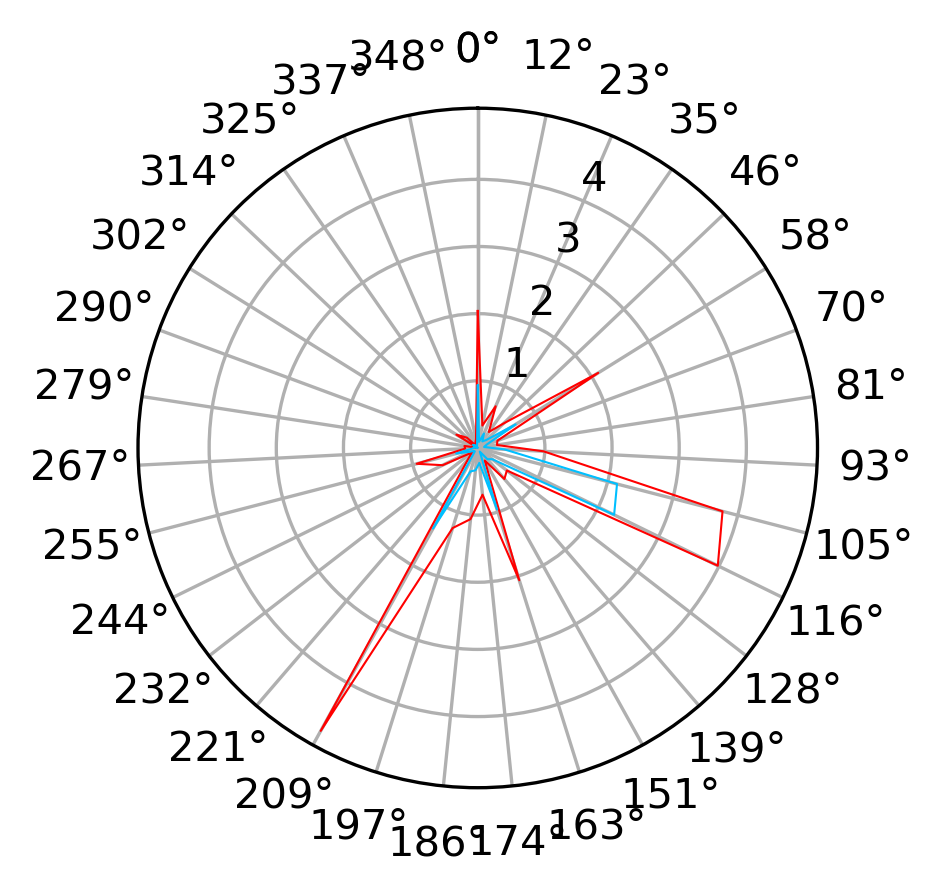

In [9]:
#雷达图绘制

#plt.style.use('default')
fig=plt.figure(figsize=(8,3), dpi=300)
ax = fig.add_subplot(121, polar=True)

values_beforeAD = Disposal_Sludge_2017_pro.Sum_2017_GHG_Before_AD
values_afterAD = Disposal_Sludge_2017_pro.Sum_2017_GHG_After_AD

ticks = Disposal_Sludge_2017_pro.Province


angles = np.linspace(0, 2*np.pi, len(values_beforeAD), endpoint=False)

values_beforeAD = np.concatenate((values_beforeAD, [values_beforeAD[0]]))
values_afterAD = np.concatenate((values_afterAD, [values_afterAD[0]]))
ticks = np.concatenate((ticks, [ticks[0]]))
angles = np.concatenate((angles,[angles[0]]))

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rticks(np.arange(1, 5, 1))

ax.plot(angles, values_beforeAD, '-', linewidth=0.5, color='red', label='Without AD')
ax.plot(angles, values_afterAD, '-', linewidth=0.5, color='deepskyblue', label='With AD')

ax.set_thetagrids(angles * 180/np.pi, ticks[0:-1], fontsize=4.2)
#ax.set_rscale('symlog')

ax.legend(loc=(1,1))
ax.text(0.85,7,'Unit: Mt ${CO_2-eq}$')

ax.set_rlabel_position(-40)


#______________________________________________________

co2 = pd.read_csv('test1.csv')
total_co2 = co2['total']


por_before = co2.Sum_2017_GHG_Before_AD*100 / total_co2 
por_after = co2.Sum_2017_GHG_After_AD*100 / total_co2 
ax2 = fig.add_subplot(122, polar=True)


ticks = Disposal_Sludge_2017_pro.Province


angles = np.linspace(0, 2*np.pi, len(por_before), endpoint=False)

por_before = np.concatenate((por_before, [por_before[0]]))
por_after = np.concatenate((por_after, [por_after[0]]))
ticks = np.concatenate((ticks, [ticks[0]]))
angles = np.concatenate((angles,[angles[0]]))

ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)
#ax.set_rticks(np.arange(2, 12, 2))

ax2.plot(angles, por_before, '-', linewidth=0.5, color='red', label='Without AD')
ax2.plot(angles, por_after, '-', linewidth=0.5, color='deepskyblue', label='With AD')

ax2.set_thetagrids(angles * 180/np.pi, ticks[0:-1], fontsize=4.2)
#ax.set_rscale('symlog')

ax2.legend(loc=(1,1))
ax2.text(0.84,3.6,'Unit: %')

ax2.set_rlabel_position(-40)
#plt.savefig('total_co2_2017.png', dpi=400)

In [7]:
Disposal_Sludge_2017_pro

,Province,Sludge,WWP,Landfill_2015,Incineration_2015,Land_application_2015,Building_material_2015,Landfill_percent_2015,Incineration_percent_2015,Land_application_percent_2015,...,Incineration_2017_GHG_Before_AD,Land_application_2017_GHG_Before_AD,Building_material_2017_GHG_Before_AD,Landfill_2017_GHG_After_AD,Incineration_2017_GHG_After_AD,Land_application_2017_GHG_After_AD,Building_material_2017_GHG_After_AD,Sum_2017_GHG_Before_AD,Sum_2017_GHG_After_AD,PGER_2017
0,Beijing,1379965,4923895,53.0,15.5,147.9,11.1,0.232967,0.068132,0.650110,...,0.550015,0.456639,0.393208,0.182604,0.376078,0.314892,0.056692,2.040262,0.930267,-1.109995
1,Tianjin,110247,177677,42.9,5.8,12.1,22.7,0.513772,0.069461,0.144910,...,0.044799,0.008132,0.175033,0.032173,0.030632,0.005608,0.025236,0.340794,0.093647,-0.247146
2,Hebei,376190,99719,267.7,12.3,101.5,7.0,0.689060,0.031660,0.261261,...,0.069675,0.050026,0.039585,0.147236,0.047641,0.034498,0.005707,0.675648,0.235082,-0.440566
3,Shanxi,160781,165919,59.4,8.2,42.6,2.6,0.526596,0.072695,0.377660,...,0.068375,0.030907,0.021643,0.048091,0.046752,0.021313,0.003120,0.289580,0.119276,-0.170304
4,Inner Mongolia,225577,73861,82.2,4.8,1.4,4.2,0.887689,0.051836,0.015119,...,0.068404,0.001736,0.059751,0.113738,0.046772,0.001197,0.008615,0.528773,0.170321,-0.358452
5,Liaoning,1084649,65960,156.2,4.6,40.4,8.6,0.744519,0.021926,0.192564,...,0.139123,0.106312,0.259654,0.458683,0.095127,0.073312,0.037436,2.113711,0.664558,-1.449153
6,Jilin,124160,255291,57.7,13.2,7.1,0.0,0.739744,0.169231,0.091026,...,0.122918,0.005753,0.000000,0.052169,0.084047,0.003967,0.000000,0.311629,0.140183,-0.171447
7,Heilongjiang,140834,105963,85.3,3.4,7.4,1.1,0.877572,0.034979,0.076132,...,0.028819,0.005457,0.009308,0.070200,0.019705,0.003763,0.001342,0.289779,0.095011,-0.194768
8,Shanghai,339850,111139,199.9,45.8,7.1,19.8,0.733309,0.168012,0.026045,...,0.334028,0.004505,0.144158,0.141554,0.228395,0.003107,0.020784,0.979128,0.393841,-0.585287
9,Jiangsu,756700,229526,106.5,417.2,27.8,89.4,0.166173,0.650960,0.043377,...,2.881600,0.016707,0.616430,0.071422,1.970324,0.011521,0.088876,3.765216,2.142143,-1.623073


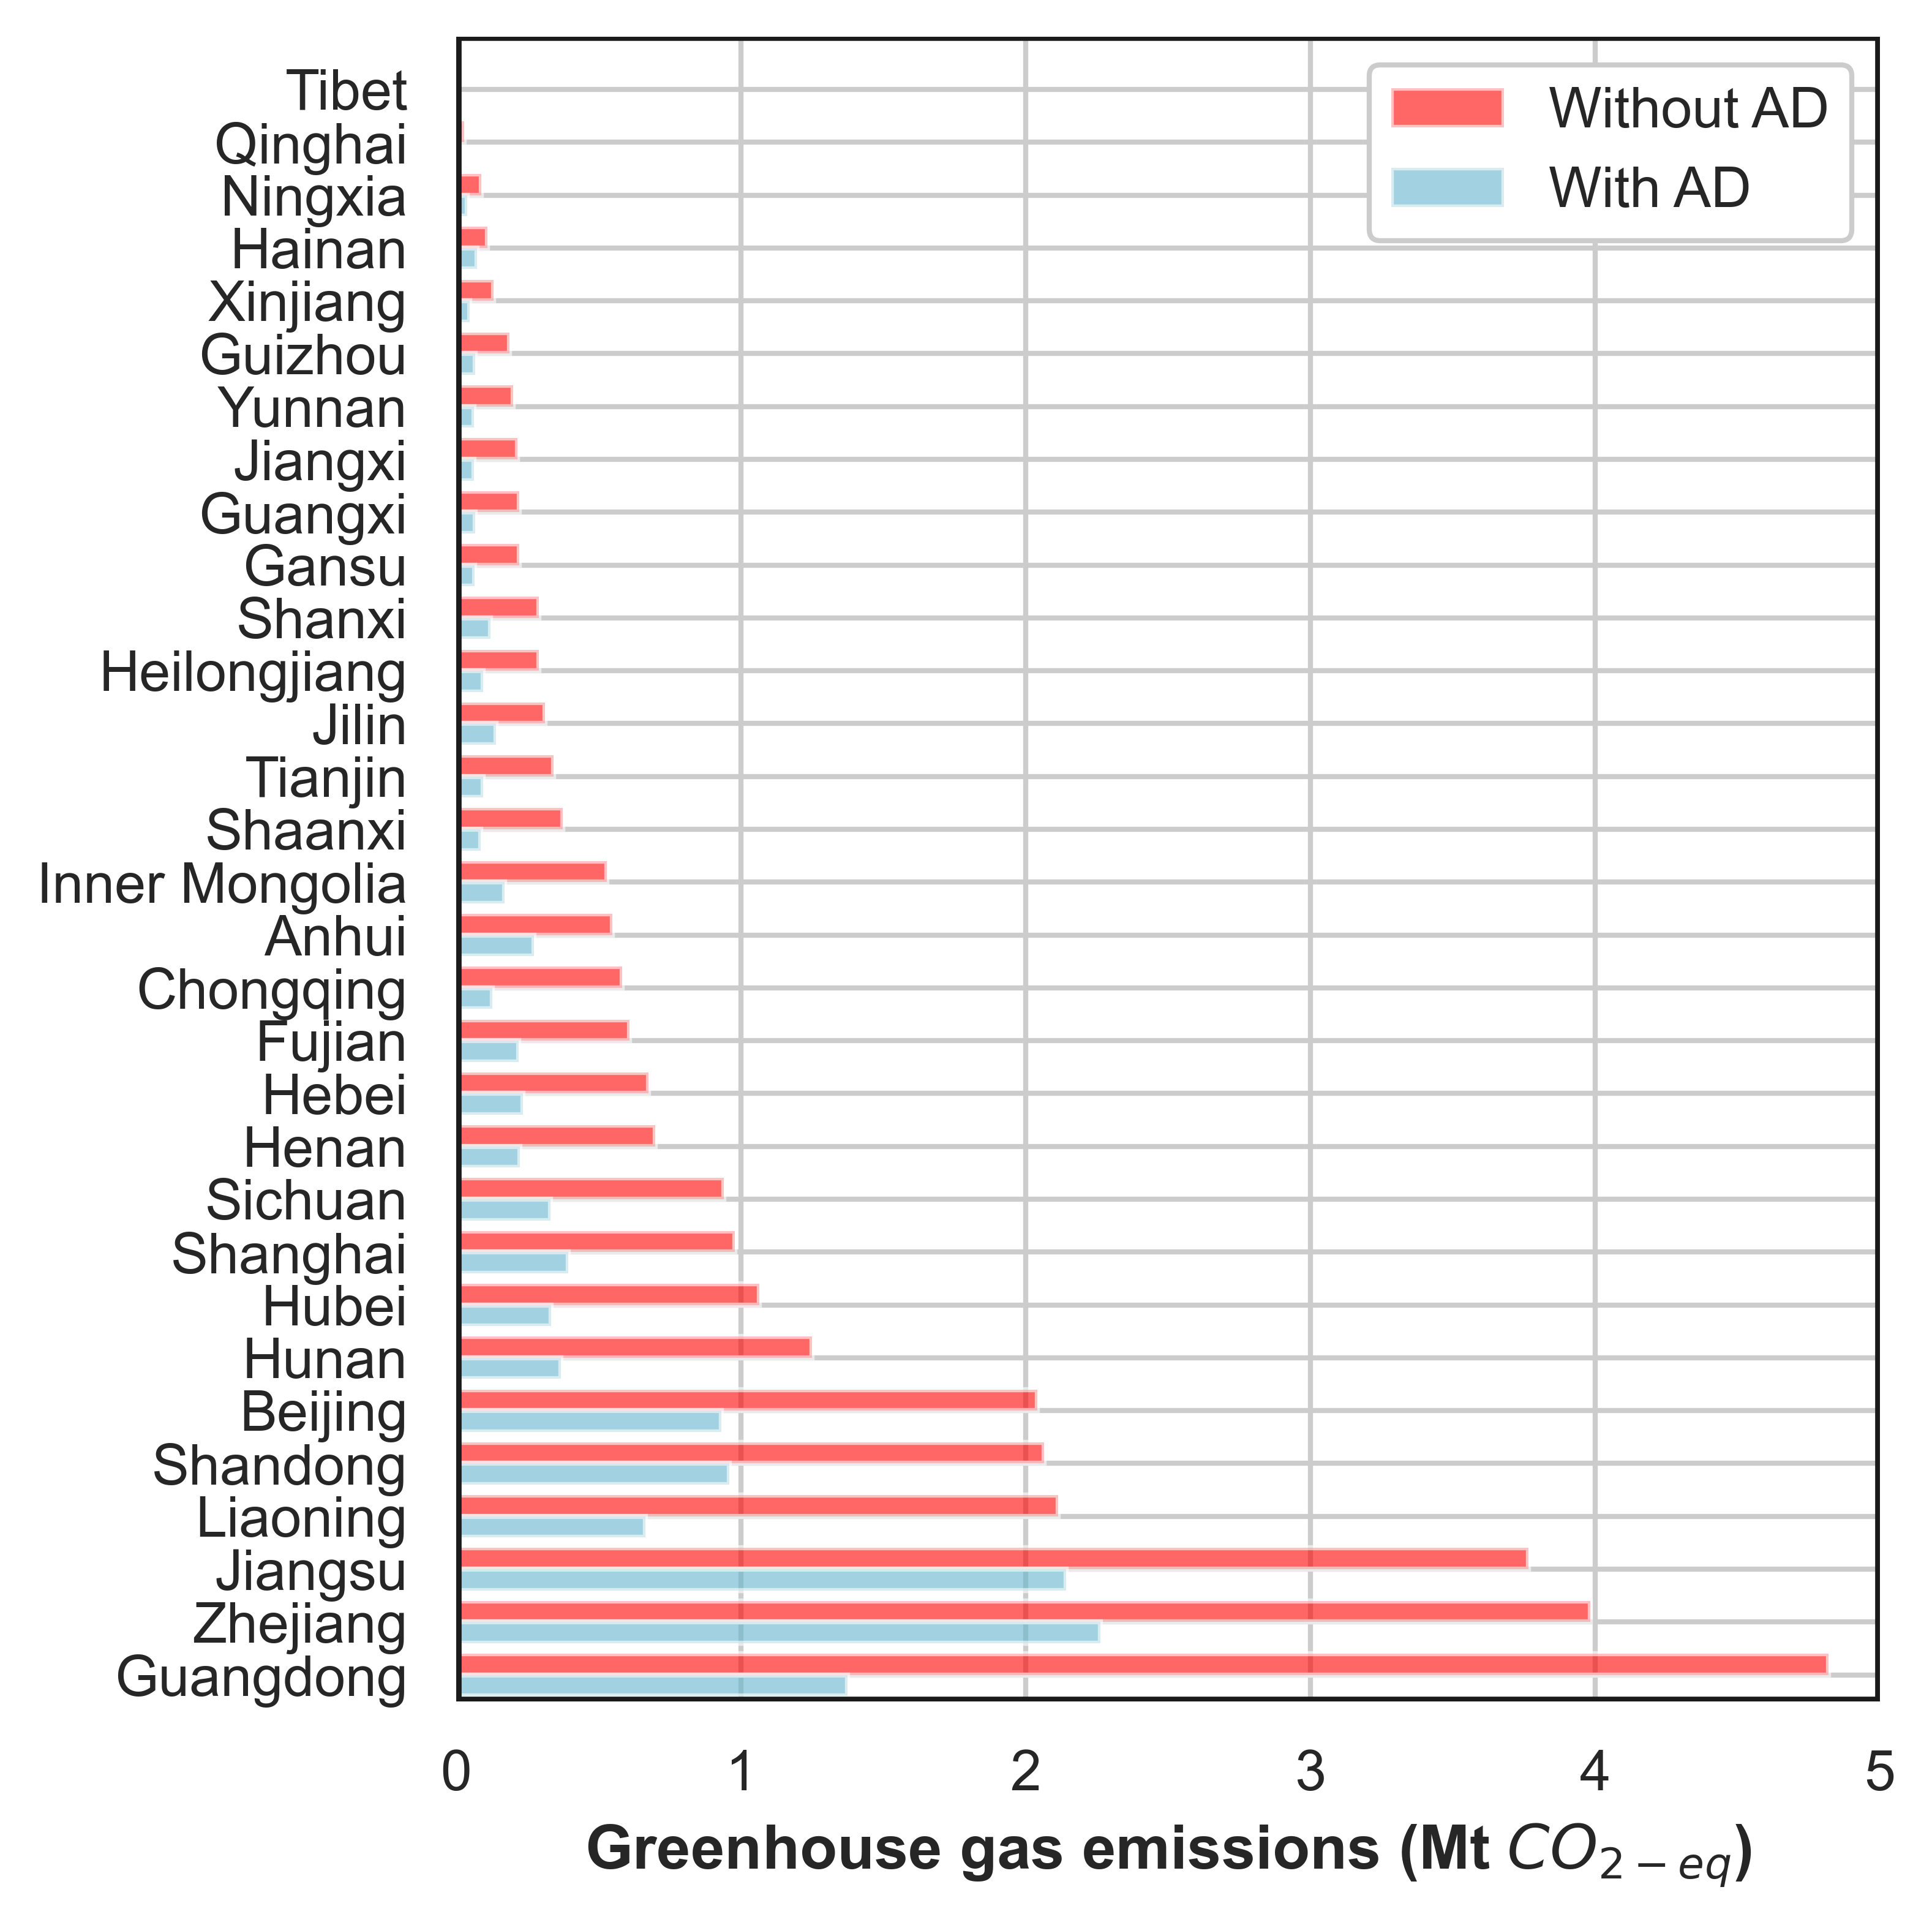

In [16]:
#柱状比对图
import matplotlib as mpl
mpl.rcParams['axes.labelweight'] = 'bold'
Disposal_Sludge_2017_pro = Disposal_Sludge_2017_pro.sort_values(by='Sum_2017_GHG_Before_AD', ascending=False)
fig=plt.figure(figsize=(5,6), dpi=600)
plt.rc('font',family='Times New Roman')
sns.set(style="whitegrid")

num = np.arange(0,len(Disposal_Sludge_2017_pro['Province']), 1)
bar_width = 0.4


plt.barh(num + (bar_width/2), Disposal_Sludge_2017_pro['Sum_2017_GHG_Before_AD'], bar_width, align="center", color="red", label="Without AD", alpha=0.6)
plt.barh(num - (bar_width/2), Disposal_Sludge_2017_pro['Sum_2017_GHG_After_AD'], bar_width, align="center", color="c", label="With AD", alpha=0.6)

plt.yticks(num, Disposal_Sludge_2017_pro['Province'])
plt.ylim(-0.5,31)
plt.xlim(0,5)


plt.axhline(31,c='k',lw=1.5)
plt.axhline(-0.5,c='k',lw=2)
plt.axvline(0,c='k',lw=2)
plt.axvline(5,c='k',lw=2)


plt.xlabel('Greenhouse gas emissions (Mt ${CO_{2-eq}}$)')
plt.legend(frameon=True, fancybox=True, framealpha=1)
sns.despine(top=True, right=True, left=True, bottom=True)

plt.savefig('Fig.2017GHG.jpg',dpi=600,bbox_inches='tight')

In [ ]:
values_beforeAD

In [10]:
co

NameError: name 'co' is not defined

In [ ]:
Disposal_Sludge_2017_pro.Sum_2017_GHG_Before_AD*100 

In [ ]:
#雷达图绘制
co2 = pd.ExcelFile('Emission_Inventories_for_30_Provinces_2017.xlsx')
total_co2_data = co2.parse('Sum')
total_co2 = total_co2_data['Total']
total_co2 = total_co2[0:-2]


#total_co2 =  [70.06, 132.15, 541.90, 1521.41, 765.07, 515.65,214.52, 355.33, 156.58, 645.05, 401.44, 397.02, 232.92, 179.01,1101.80,557.62,266.93, 275.97,533.20,193.85, 60.75 , 127.77,229.76, 340.34, 198.22, 10000000, 637.83, 173.99, 48.68, 226.24, 452.26]
por_before = Disposal_Sludge_2017_pro.Sum_2017_GHG_Before_AD*100 / total_co2 
por_after = Disposal_Sludge_2017_pro.Sum_2017_GHG_After_AD*100 / total_co2 
#plt.style.use('default')
fig=plt.figure(figsize=(3,3), dpi=300)
ax = fig.add_subplot(111, polar=True)


ticks = Disposal_Sludge_2017_pro.Province


angles = np.linspace(0, 2*np.pi, len(por_before), endpoint=False)

por_before = np.concatenate((por_before, [por_before[0]]))
por_after = np.concatenate((por_after, [por_after[0]]))
ticks = np.concatenate((ticks, [ticks[0]]))
angles = np.concatenate((angles,[angles[0]]))

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
#ax.set_rticks(np.arange(2, 12, 2))

ax.plot(angles, por_before, '-', linewidth=0.5, color='red', label='Baseline')
ax.plot(angles, por_after, '-', linewidth=0.5, color='deepskyblue', label='Project')

ax.set_thetagrids(angles * 180/np.pi, ticks[0:-1], fontsize=4.2)
#ax.set_rscale('symlog')

ax.legend(loc=(1,1))
ax.text(0.84,3.6,'Unit: %')

ax.set_rlabel_position(-40)

plt.savefig("2017_percent.png", dpi=400)

In [ ]:
np.sort(por_before)

In [ ]:
CO2_2030

In [ ]:
#雷达图绘制

#plt.style.use('default')
fig=plt.figure(figsize=(6,6), dpi=300)
ax = fig.add_subplot(121, polar=True)

values_beforeAD_2015 = CO2_2030[CO2_2030['Process'] == 'Before_AD'][CO2_2030['percent'] == 2015].CO2_EQ
values_afterAD_2015 = CO2_2030[CO2_2030['Process'] == 'After_AD'][CO2_2030['percent'] == 2015].CO2_EQ

ticks = ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']
values_beforeAD_2030 = CO2_2030[CO2_2030['Process'] == 'Before_AD'][CO2_2030['percent'] == 2030].CO2_EQ
values_afterAD_2030  = CO2_2030[CO2_2030['Process'] == 'After_AD'][CO2_2030['percent'] == 2030 ].CO2_EQ
values_beforeAD_2030 = np.concatenate((values_beforeAD_2030, [values_beforeAD_2030[10]]))
values_afterAD_2030 = np.concatenate((values_afterAD_2030, [values_afterAD_2030[15]]))

angles = np.linspace(0, 2*np.pi, len(values_beforeAD_2015), endpoint=False)

values_beforeAD_2015 = np.concatenate((values_beforeAD_2015, [values_beforeAD_2015[0]]))
values_afterAD_2015 = np.concatenate((values_afterAD_2015, [values_afterAD_2015[5]]))
ticks = np.concatenate((ticks, [ticks[0]]))
angles = np.concatenate((angles,[angles[0]]))

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rticks(np.arange(30, 60, 5))

ax.plot(angles, values_beforeAD_2015, '.-', linewidth=1, color='red', label='Sludge management in 2015')
ax.plot(angles, values_beforeAD_2030, '.-', linewidth=1, color='deepskyblue', label='Sludge management in 2030')

ax.set_thetagrids(angles * 180/np.pi, ticks[0:-1], fontsize=6)
#ax.set_rscale('symlog')

#ax.legend(loc=(1,1))
#ax.text(0.85,17,'Unit: Mt ${CO_2-eq}$')
ax.text(-np.pi/4,63.5,'(a) Baseline')
#ax.set_rlabel_position(-40)

#雷达图绘制

#plt.style.use('default')
#fig=plt.figure(figsize=(6,6), dpi=300)
ax = fig.add_subplot(122, polar=True)

values_beforeAD_2030 = CO2_2030[CO2_2030['Process'] == 'Before_AD'][CO2_2030['percent'] == 2030].CO2_EQ
values_afterAD_2030  = CO2_2030[CO2_2030['Process'] == 'After_AD'][CO2_2030['percent'] == 2030 ].CO2_EQ

ticks = ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']


angles = np.linspace(0, 2*np.pi, len(values_beforeAD_2030), endpoint=False)

values_beforeAD_2030 = np.concatenate((values_beforeAD_2030, [values_beforeAD_2030[10]]))
values_afterAD_2030 = np.concatenate((values_afterAD_2030, [values_afterAD_2030[15]]))
ticks = np.concatenate((ticks, [ticks[0]]))
angles = np.concatenate((angles,[angles[0]]))

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rticks(np.arange(10, 30, 2))

ax.plot(angles, values_afterAD_2015, '.-', linewidth=1, color='red', label='Sludge management in 2015')
ax.plot(angles, values_afterAD_2030, '.-', linewidth=1, color='deepskyblue', label='Sludge management in 2030')

ax.set_thetagrids(angles * 180/np.pi, ticks[0:-1], fontsize=6)
#ax.set_rscale('symlog')

ax.legend(loc=(0.8,1))
ax.text(6.9,23,'Unit: Mt ${CO_2-eq}$')
ax.text(-np.pi/4,26,'(b) Project')
#ax.set_rlabel_position(-40)